1000 3
1000
[[ 1.         -2.38519938  0.02641654]
 [ 1.         -1.74830343 -1.4226907 ]
 [ 1.         -2.45431681 -1.46071435]
 ...
 [ 1.         -1.88691344 -1.67526794]
 [ 1.         -0.96714666  4.62965124]
 [ 1.         -1.78872907  3.53964501]]
[0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1
 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1
 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1
 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 

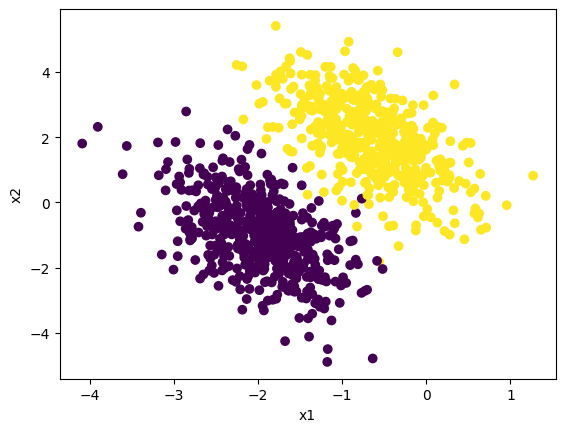

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5 ,0],[0 ,1.5]]
X, y = make_blobs(n_samples = 1000, centers = centers, random_state = 40)
transformation = [[0.4, 0.2],[-0.4, 1.2]]
X = np.dot(X, transformation)

# Add a bias term to the feature matrix
X = np.c_[np.ones((X.shape[0], 1)), X]

print(len(X),len(X[0]))
print(len(y))

# Define the logistic sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Define the logistic loss ( binary cross - entropy )function
def log_loss(y_true, y_pred):
  epsilon = 1e-15
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon) # Clip to avoid log (0)
  return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

plt.scatter(X[:,1], X[:,2], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
print(X)
print(y)

# Defining parameters
iterations = 10

N = X.shape[0]
D = X.shape[1] - 1
N_1 = np.ones((N,1))

In [ ]:
# Perform batch gradient descent
# Gradient descent parameters
learning_rate = 0.1
loss_history_bgd = []

Z = np.zeros((N,N))

# Initialize coefficients
W_bgd = np.zeros((X.shape[1],1))

# Intial loss
loss = 0
for i in range(N):
  loss  += log_loss(y[i], (sigmoid(W_bgd.T@X[i,:].reshape(D+1,1)))).item()
loss_history_bgd.append(loss / N)

for _ in range(iterations):
    for i in range(N):
        Z[i,i] = sigmoid(W_bgd.T@X[i,:].reshape(D+1,1)) - y[i]
    gradient = (N_1.T@Z@X).T / N
    W_bgd = W_bgd - learning_rate * gradient
    loss = 0
    for i in range(N):
      loss  += log_loss(y[i], (sigmoid(W_bgd.T@X[i,:].reshape(D+1,1))))
    loss_history_bgd.append(loss / N)

# Updated weights after t iterations
print("Updated weights (Batch Gradient Descent):", W_bgd)

Updated weights (Batch Gradient Descent): [[0.00903176]
 [0.26230116]
 [0.49949384]]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


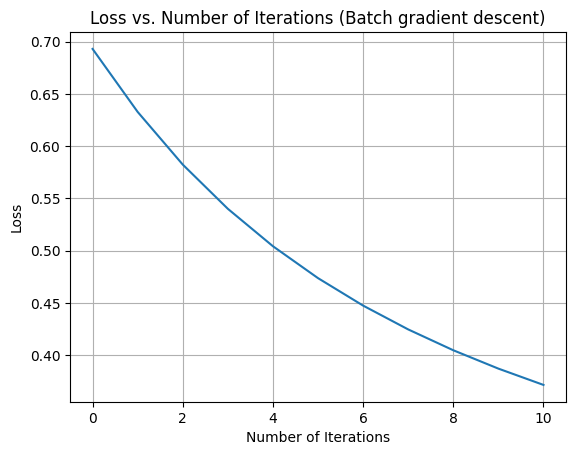

In [ ]:
# Plot the loss vs. iteration
plt.plot(loss_history_bgd)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Iterations (Batch gradient descent)')
plt.grid(True)
plt.show()

In [ ]:
# Perform Newton's method weight update
# Newton's method parameters
loss_history_nm = []
iteration_arr_nm = list(range(1,iterations + 1))

# Initialize coefficients
W_nm = np.zeros((X.shape[1],1))

# Intial loss
loss = 0
for i in range(N):
  loss  += log_loss(y[i], (sigmoid(W_nm.T@X[i,:].reshape(D+1,1)))).item()
loss_history_nm.append(loss / N)

Z = np.zeros((N,N))
S = np.zeros((N,N))

for _ in range(iterations):
    for i in range(N):
        Z[i,i] = sigmoid(W_nm.T@X[i,:].reshape(D+1,1)) - y[i]
    gradient = (N_1.T@Z@X).T / N

    for i in range(N):
        S[i,i] = (sigmoid(W_nm.T@X[i,:].reshape(D+1,1)) - y[i]) * (1 - sigmoid(W_nm.T@X[i,:].reshape(D+1,1)) - y[i])
    Hessian = (X.T@S@X)/ N
    W_nm -= np.linalg.inv(Hessian)@gradient # Update weights using Newton's method
    loss = 0
    for i in range(N):
      loss  += log_loss(y[i], (sigmoid(W_nm.T@X[i,:].reshape(D+1,1)))).item()
    loss_history_nm.append(loss / N)

# Updated weights after Newton's Method
print("Updated weights (Newton's Method):", W_nm)

Updated weights (Newton's Method): [[11.71643583]
 [10.20983751]
 [ 4.43019025]]


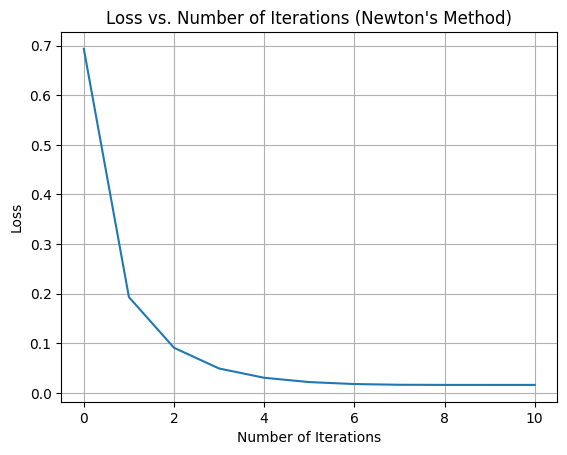

In [ ]:
# Plot the loss vs. iteration for Newton's Method
plt.plot(loss_history_nm, label="Newton's Method")
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title("Loss vs. Number of Iterations (Newton's Method)")
plt.grid(True)

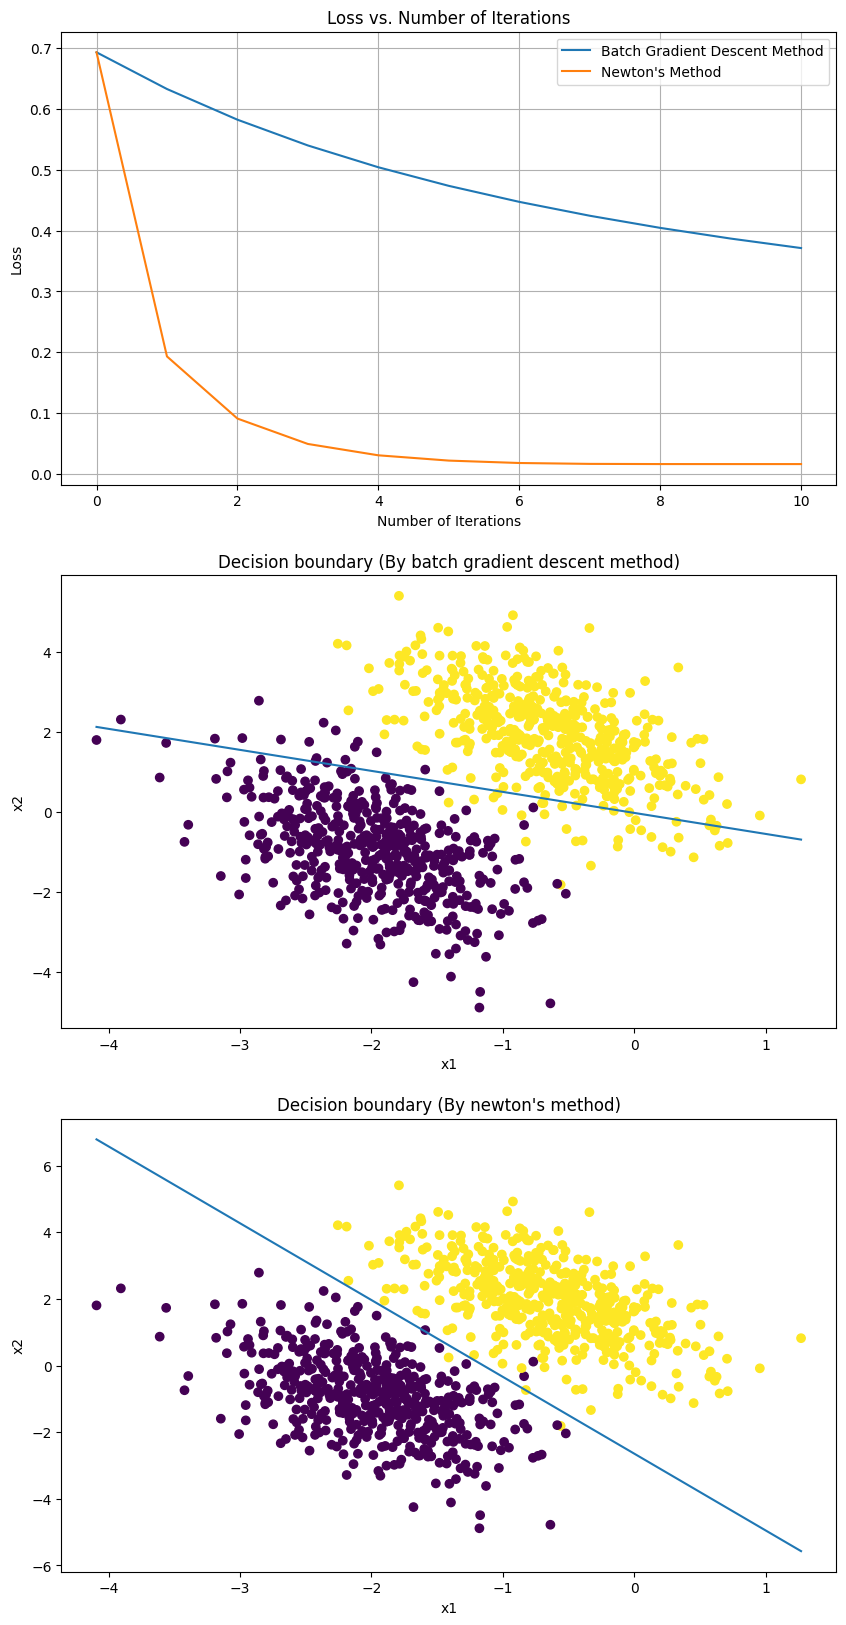

In [ ]:
# Plot both loss curves in a single plot
fig = plt.figure(figsize=(10, 20))
ax1 = fig.add_subplot(311)
ax1.plot(loss_history_bgd, label="Batch Gradient Descent Method")
ax1.plot(loss_history_nm, label="Newton's Method")
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Iterations')
plt.legend()
plt.grid(True)

# Plot the point and decision boundary for Batch gradient descent
ax2 = fig.add_subplot(312)
ax2.scatter(X[:,1], X[:,2], c=y)
x1_bgd = np.linspace(min(X[:,1]),max(X[:,1]),100)
x2_bgd = -(W_bgd[0] + W_bgd[1] * x1_bgd) / W_bgd[2]
plt.plot(x1_bgd, x2_bgd)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision boundary (By batch gradient descent method)')

# Plot the point and decision boundary for Newton's method
ax3 = fig.add_subplot(313)
ax3.scatter(X[:,1], X[:,2], c=y)
x1_nm = np.linspace(min(X[:,1]),max(X[:,1]),100)
x2_nm = -(W_nm[0] + W_nm[1] * x1_nm) / W_nm[2]
plt.plot(x1_nm, x2_nm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Decision boundary (By newton's method)")

# Show the plot
plt.show()